## **Allocation of marks**

Stages 1,2,3   Total 30%

Ideally your dataset will not need a lot of work. Marks going for the choosing,  training, evaluation and refining of model primarily




---



Stage 4,5       Total 60%

Choose your model

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


Train and evaluate your model. Refine the model or choose another estimator or approach?

Do not overwrite cells and add commentry between iterations.



---




Stage 6         Total 10%

# **Bitcoin Prediction using BTC and S&P 500 Data**

This aim of this project is to predict the next-day percentage return of Bitcoin using historical data for both Bitcoin and the S&P 500 index. Financial market prediction is notoriously challenging due to the amount influencing factors. The goal is to evaluate if the addition of stock market data (S&P 500) alongside Bitcoin's own history can provide predictive power for its short-term returns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Stage 1: Data Description**

Two publicly available datasets are used for this project, sourced from Kaggle:

- **Bitcoin Historical Data 2012-2025**

    Link: <https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data>
- **S&P 500 Historical Data 1993-2025**

    Link: <https://www.kaggle.com/datasets/gkitchen/s-and-p-500-spy>
The two datasets will be linked by common dates.

In [2]:
btc = pd.read_csv('btc.csv')
spx = pd.read_csv('spx.csv')

C:\Users\lukef\AppData\Local\Temp\ipykernel_3552\4038986378.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  btc = pd.read_csv('btc.csv')


**Bitcoin Dataset**
- Contains minute-level timestamped data from 2012-2025
- Contains data for Open, High, Low, Close prices and Volume

In [3]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012523 entries, 0 to 7012522
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
 6   datetime   object 
dtypes: float64(6), object(1)
memory usage: 374.5+ MB


In [4]:
btc.describe()

,Timestamp,Open,High,Low,Close,Volume
count,7.012523e+06,7.012523e+06,7.012523e+06,7.012523e+06,7.012523e+06,7.012523e+06
mean,1.535788e+09,1.742234e+04,1.742929e+04,1.741517e+04,1.742234e+04,5.301018e+00
std,1.214617e+08,2.408605e+04,2.409406e+04,2.407784e+04,2.408603e+04,2.251739e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.430600e+09,4.244000e+02,4.245000e+02,4.242600e+02,4.244000e+02,1.814629e-02
50%,1.535788e+09,6.595500e+03,6.599300e+03,6.591520e+03,6.595280e+03,4.685897e-01
75%,1.640976e+09,2.732800e+04,2.733600e+04,2.732100e+04,2.732800e+04,3.033455e+00
max,1.746233e+09,1.091110e+05,1.093560e+05,1.087940e+05,1.090360e+05,5.853852e+03


In [5]:
btc.head()

,Timestamp,Open,High,Low,Close,Volume,datetime
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00+00:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00+00:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00+00:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00+00:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00+00:00


**S&P500 Dataset**

- Contains daily timestamped data from 1993-2025
- Contains data for Open, High, Low, Close prices and Volume

In [6]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     8107 non-null   object 
 1   Open     8107 non-null   float64
 2   High     8107 non-null   float64
 3   Low      8107 non-null   float64
 4   Close    8107 non-null   float64
 5   Volume   8107 non-null   int64  
 6   Day      8107 non-null   int64  
 7   Weekday  8107 non-null   int64  
 8   Week     8107 non-null   int64  
 9   Month    8107 non-null   int64  
 10  Year     8107 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 696.8+ KB


In [7]:
spx.describe()

,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
count,8107.000000,8107.000000,8107.000000,8107.000000,8.107000e+03,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000
mean,155.874010,156.782782,154.875325,155.886797,8.350480e+07,15.725669,2.021833,26.521278,6.519181,2008.667571
std,134.417128,135.125911,133.640893,134.442387,9.079137e+07,8.754794,1.399884,14.973276,3.431465,9.301029
min,24.156861,24.226434,23.826423,24.156862,5.200000e+03,1.000000,0.000000,1.000000,1.000000,1993.000000
25%,70.573143,71.169641,69.977120,70.547653,1.107990e+07,8.000000,1.000000,13.000000,4.000000,2001.000000
50%,94.262298,95.039323,93.554997,94.288475,6.236150e+07,16.000000,2.000000,26.000000,7.000000,2009.000000
75%,206.477124,207.003381,205.718424,206.501564,1.130016e+08,23.000000,3.000000,40.000000,10.000000,2017.000000
max,609.705872,611.390763,607.731787,611.091675,8.710263e+08,31.000000,4.000000,53.000000,12.000000,2025.000000


In [8]:
spx.head()

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
0,1993-01-29,24.469912,24.469912,24.348171,24.452520,1003200,29,4,4,1,1993
1,1993-02-01,24.469918,24.626442,24.469918,24.626442,480500,1,0,5,2,1993
2,1993-02-02,24.609034,24.695992,24.556860,24.678600,201300,2,1,5,2,1993
3,1993-02-03,24.713392,24.956873,24.696000,24.939482,529400,3,2,5,2,1993
4,1993-02-04,25.026437,25.096004,24.748173,25.043829,531500,4,3,5,2,1993


# **Stage 2: Target Property**

The goal is to predict the next day's percentage return for Bitcoin. A new property will need to be added to the dataset for the % difference between closing price of current day vs closing price of following day.

# **Stage 3**

**Cleaning BTC**

As the timestamp levels between BTC and SPX do not match, BTC's minute level data must be aggregated to daily

In [9]:
btc['datetime'] = pd.to_datetime(btc['datetime'])  # convert datetime to datetime type
btc = btc.set_index('datetime') # set frame to be indexed by date

In [10]:
btc = btc.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}) # aggregate the minute-level data to daily

In [11]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4823 entries, 2012-01-01 00:00:00+00:00 to 2025-03-15 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4823 non-null   float64
 1   High    4823 non-null   float64
 2   Low     4823 non-null   float64
 3   Close   4823 non-null   float64
 4   Volume  4823 non-null   float64
dtypes: float64(5)
memory usage: 226.1 KB


In [12]:
btc.head()

,Open,High,Low,Close,Volume
datetime,,,,,
2012-01-01 00:00:00+00:00,4.58,4.84,4.58,4.84,10.000000
2012-01-02 00:00:00+00:00,4.84,5.00,4.84,5.00,10.100000
2012-01-03 00:00:00+00:00,5.00,5.32,5.00,5.29,107.085281
2012-01-04 00:00:00+00:00,5.29,5.57,4.93,5.57,107.233260
2012-01-05 00:00:00+00:00,5.57,6.46,5.57,6.42,70.328742


In [13]:
btc.isnull().sum() # null check

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**Cleaning SPX**

Minimal cleaning needed. Simply dropping unnecessary columns

In [14]:
spx['datetime'] = pd.to_datetime(spx['Date'])   # convert date to type datetime
spx = spx.set_index('datetime') # set frame to be indexed by date

In [15]:
spx.head()

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
datetime,,,,,,,,,,,
1993-01-29,1993-01-29,24.469912,24.469912,24.348171,24.452520,1003200,29,4,4,1,1993
1993-02-01,1993-02-01,24.469918,24.626442,24.469918,24.626442,480500,1,0,5,2,1993
1993-02-02,1993-02-02,24.609034,24.695992,24.556860,24.678600,201300,2,1,5,2,1993
1993-02-03,1993-02-03,24.713392,24.956873,24.696000,24.939482,529400,3,2,5,2,1993
1993-02-04,1993-02-04,25.026437,25.096004,24.748173,25.043829,531500,4,3,5,2,1993


In [16]:
spx = spx.drop(columns=['Date', 'Day', 'Weekday', 'Week', 'Month', 'Year']) # drop unnecessary columns as we have datetime already

In [17]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8107 entries, 1993-01-29 to 2025-04-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    8107 non-null   float64
 1   High    8107 non-null   float64
 2   Low     8107 non-null   float64
 3   Close   8107 non-null   float64
 4   Volume  8107 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 380.0 KB


In [18]:
spx.isnull().sum() # null check

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**Merging BTC SPY**

Align the date range across both datasets and merge


In [19]:
btc.index = btc.index.tz_localize(None) # fix "Cannot compare tz-naive and tz-aware timestamps" error

In [20]:
start_date = max(btc.index.min(), spx.index.min()) # get common minimum date
end_date = min(btc.index.max(), spx.index.max()) # get common maximum date
print(start_date, end_date)

2012-01-01 00:00:00 2025-03-15 00:00:00


In [21]:
btc = btc[start_date:end_date]  # clip datasets to common start and end dates
spx = spx[start_date:end_date]

In [22]:
spx_btc = pd.merge(btc, spx, left_index=True, right_index=True, how='outer', suffixes=('_btc', '_spx'))

Check for any null values introduced from merge

In [23]:
spx_btc.isnull().sum()

Open_btc         0
High_btc         0
Low_btc          0
Close_btc        0
Volume_btc       0
Open_spx      1504
High_spx      1504
Low_spx       1504
Close_spx     1504
Volume_spx    1504
dtype: int64

Null values were introduced for the S&P500 dataset, as it does not trade on weekends and holidays, whereas Bitcoin is active 24/7.

In [24]:
spx_btc['Close_spx'].isnull()

datetime
2012-01-01     True
2012-01-02     True
2012-01-03    False
2012-01-04    False
2012-01-05    False
              ...  
2025-03-11    False
2025-03-12    False
2025-03-13    False
2025-03-14    False
2025-03-15     True
Name: Close_spx, Length: 4823, dtype: bool

Null weekend values were forward-filled with the last known S&P500 closing price, as the price does not change until the next market open.

In [25]:
columns_to_fill = ['Open_spx', 'High_spx', 'Low_spx', 'Close_spx', 'Volume_spx']
spx_btc[columns_to_fill] = spx_btc[columns_to_fill].ffill()

In [26]:
spx_btc.isnull().sum()

Open_btc      0
High_btc      0
Low_btc       0
Close_btc     0
Volume_btc    0
Open_spx      2
High_spx      2
Low_spx       2
Close_spx     2
Volume_spx    2
dtype: int64

First few dates in the dataset were weekends - backward fill those

In [27]:
columns_to_fill = ['Open_spx', 'High_spx', 'Low_spx', 'Close_spx', 'Volume_spx']
spx_btc[columns_to_fill] = spx_btc[columns_to_fill].bfill()

In [28]:
spx_btc.isnull().sum()

Open_btc      0
High_btc      0
Low_btc       0
Close_btc     0
Volume_btc    0
Open_spx      0
High_spx      0
Low_spx       0
Close_spx     0
Volume_spx    0
dtype: int64

## BTC vs SPX 2012-Present

Cleaned and merged datasets. There is a visible correlation between BTC and SPX

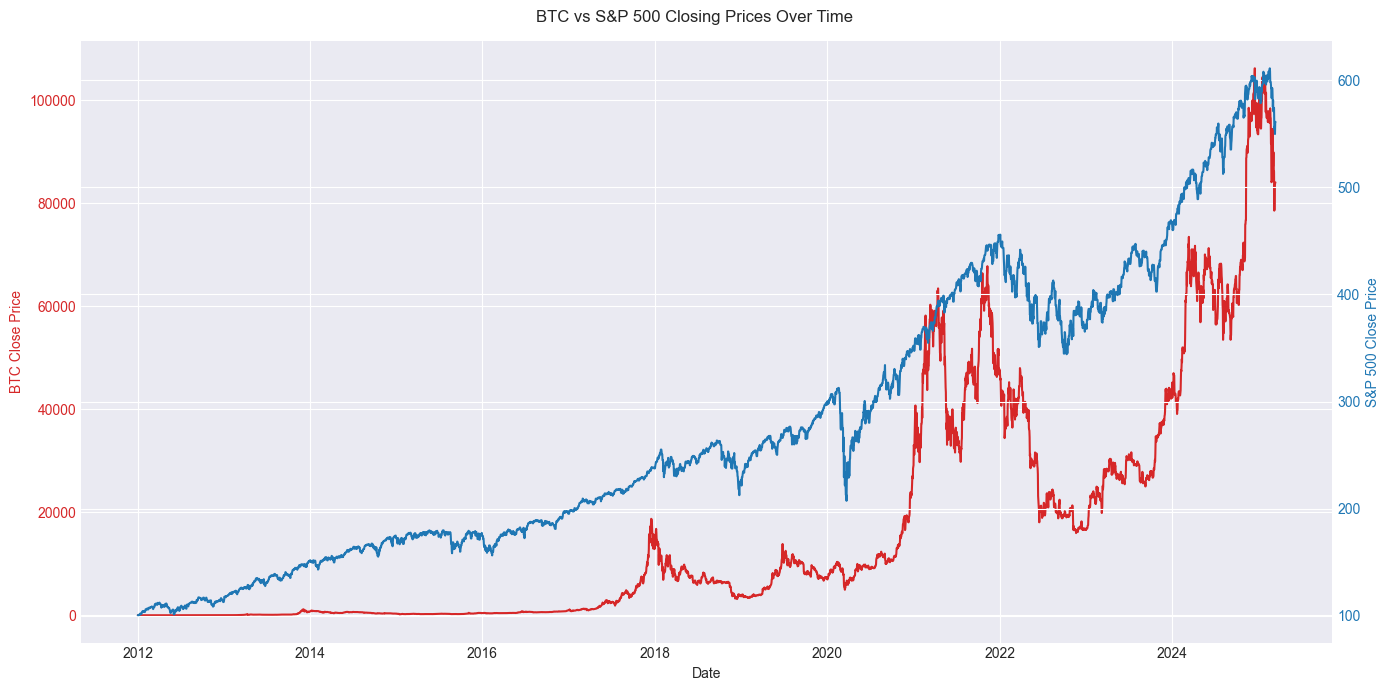

In [29]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize=(14, 7))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Close Price', color=color)
ax1.plot(spx_btc.index, spx_btc['Close_btc'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('S&P 500 Close Price', color=color)
ax2.plot(spx_btc.index, spx_btc['Close_spx'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.suptitle('BTC vs S&P 500 Closing Prices Over Time')
fig.tight_layout()
plt.show()

## Feature Engineering

In an effort to improve model performance, more features were incrementally added during training and evaluation stages

**Dataset V2**

In [30]:
datasetV2 = spx_btc.copy()

#https://www.youtube.com/watch?v=1O_BenficgE
# This video suggests adding rolling mean close prices across different intervals or "horizons".

horizons = [3, 7, 14, 30] # intervals for rolling values
assets = ["btc", "spx"]

for asset in assets:
    close_column = f"Close_{asset}"
    return_column = f"{asset}_return"
    datasetV2[return_column] = (datasetV2[close_column].shift(-1) / datasetV2[close_column]) - 1 # % return

    for horizon in horizons:
        roll_mean = datasetV2[close_column].rolling(window=horizon).mean()
        ratio_column = f"Close_Ratio_{asset}_{horizon}"
        datasetV2[ratio_column] = datasetV2[close_column] / roll_mean

        trend_column = f"Trend_{asset}_{horizon}"
        datasetV2[trend_column] = (
            datasetV2[return_column].shift(1)   # yesterday’s return
                   .rolling(window=horizon)
                   .sum()
        )

datasetV2 = datasetV2.dropna() # drop NaN values introduced by new columns

**Dataset V3**

https://medium.com/@zhonghong9998/predicting-stock-returns-a-guide-to-feature-engineering-for-financial-data-bbf6700b11d7

Features Added for:
- Lagged return
- RSI (relative strength index)
- Volatility

In [31]:
import pandas_ta as ta # built-in RSI function

datasetV3 = spx_btc.copy()

horizons = [3, 7, 14, 30] # intervals for rolling values
assets = ["btc", "spx"]

for asset in assets:
    close_column = f"Close_{asset}"
    return_column = f"{asset}_return"
    datasetV3[return_column] = (datasetV3[close_column].shift(-1) / datasetV3[close_column]) - 1 # % return

    for horizon in horizons:
        roll_mean = datasetV3[close_column].rolling(window=horizon).mean()
        ratio_column = f"Close_Ratio_{asset}_{horizon}"
        datasetV3[ratio_column] = datasetV3[close_column] / roll_mean

        trend_column = f"Trend_{asset}_{horizon}"
        datasetV3[trend_column] = (
            datasetV3[return_column].shift(1)   # yesterday’s return
                   .rolling(window=horizon)
                   .sum()
        )

# Lagged returns
for asset in assets:
    close_column = f"Close_{asset}"
    for lag in [1, 5]:
        lag_column = f"return_{asset}_{lag}"
        datasetV3[lag_column] = np.log(datasetV3[close_column]).diff(lag)
        datasetV3[lag_column] = datasetV3[lag_column].shift(1)

# RSI
for asset in assets:
        close_column = f"Close_{asset}"
        rsi_column = f"RSI_{asset}"
        datasetV3[rsi_column] = ta.rsi(datasetV3[close_column], length=14)
        datasetV3[rsi_column] = datasetV3[rsi_column].shift(1)

# Volatility
for asset in assets:
    ret1_column = f"return_{asset}_1"
    volatility_column = f"{asset}_Vol_14"
    datasetV3[volatility_column] = datasetV3[ret1_column].rolling(14).std()

datasetV3 = datasetV3.dropna() # drop NaN values introduced by new columns

# **Stage 4/5 - Train, Evaluate, Repeat**
Choose and train Estimator: https://scikit-learn.org/stable/machine_learning_map.html

Following the scikit-learn estimator guide, this dataset indicates that we should use Lasso/ElasticNet

## Lasso

### Lasso Baseline Run

In [32]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
dataset = spx_btc.copy()
dataset['target'] = spx_btc['Close_btc'].shift(-1) # set the target value to the closing price of the following day. This is what we are trying to predict
dataset = dataset.dropna() # last row becomes NaN after the shift

In [34]:
dataset

,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Open_spx,High_spx,Low_spx,Close_spx,Volume_spx,target
datetime,,,,,,,,,,,
2012-01-01,4.58,4.84,4.58,4.84,10.000000,100.655511,101.143979,100.395519,100.450668,193697900.0,5.00
2012-01-02,4.84,5.00,4.84,5.00,10.100000,100.655511,101.143979,100.395519,100.450668,193697900.0,5.29
2012-01-03,5.00,5.32,5.00,5.29,107.085281,100.655511,101.143979,100.395519,100.450668,193697900.0,5.57
2012-01-04,5.29,5.57,4.93,5.57,107.233260,100.214329,100.694917,99.828285,100.608253,127186500.0,6.42
2012-01-05,5.57,6.46,5.57,6.42,70.328742,100.064607,101.025776,99.607653,100.876083,173895000.0,6.40
...,...,...,...,...,...,...,...,...,...,...,...
2025-03-10,82271.00,84007.00,77393.00,78561.00,2503.337195,565.887728,567.831831,553.923718,558.898743,99326600.0,78763.00
2025-03-11,78599.00,78818.00,78576.00,78763.00,24.694112,557.722290,562.328429,550.364419,554.252686,88102100.0,83620.00
2025-03-12,81543.00,84437.00,80607.00,83620.00,1914.379561,560.483938,561.421121,552.029391,557.193848,69588200.0,83677.00


In [35]:
features = ['Open_btc', 'High_btc', 'Low_btc', 'Volume_btc',
            'Open_spx', 'High_spx', 'Low_spx', 'Close_spx', 'Volume_spx']
x = dataset[features]
y = dataset['target']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False) # No shuffle to keep chronological order. Shuffling would introduce data leaks - model shouldn't be trained on future data

In [37]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [38]:
reg = linear_model.LassoLarsCV(cv=5, max_iter=10_000)   # Lasso CV will automatically find the best alpha value
reg.fit(x_train, y_train)

LassoLarsCV(cv=5, max_iter=10000)

In [39]:
preds = reg.predict(x_test) # make predictions

In [40]:
def evaluate(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'\nTEST RESULTS:\nMAE:{mae}, MSE:{mse}, RMSE:{rmse}, R2:{r2}')

In [41]:
def plot_pred_vs_actual(predicted, actual, predicted_label, actual_label, xlabel, ylabel, title):
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(14, 7))
    plt.plot(actual.index, actual, label=predicted_label, color='blue', linewidth=2)
    plt.plot(actual.index, predicted, label=actual_label, color='red', linestyle='--')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [42]:
def scatter_pred_vs_actual(predicted, actual, title):
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=actual, y=predicted)
    plt.title(title)
    plt.xlim(min(actual), max(actual))
    plt.ylim(min(predicted), max(predicted))
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='black', linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.show()


TEST RESULTS:
MAE:912.1927331490621, MSE:2256957.980516435, RMSE:1502.3175365136476, R2:0.9966072183660464


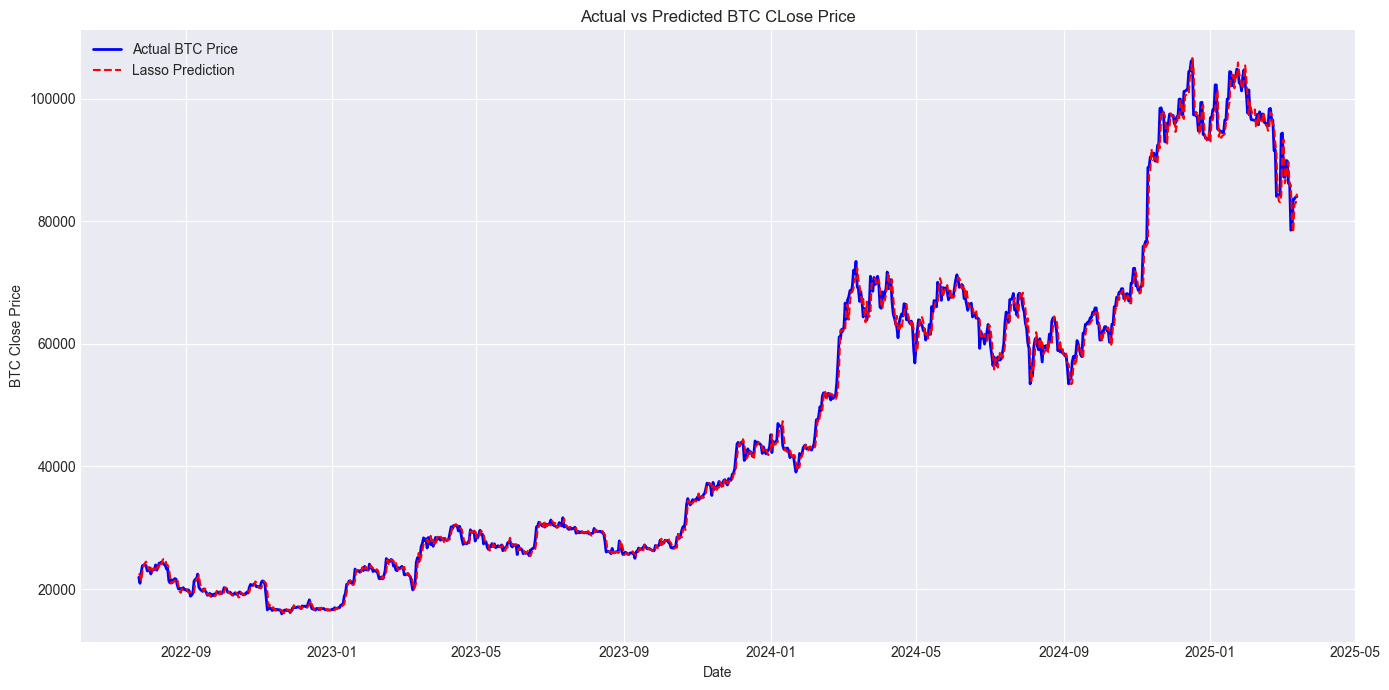

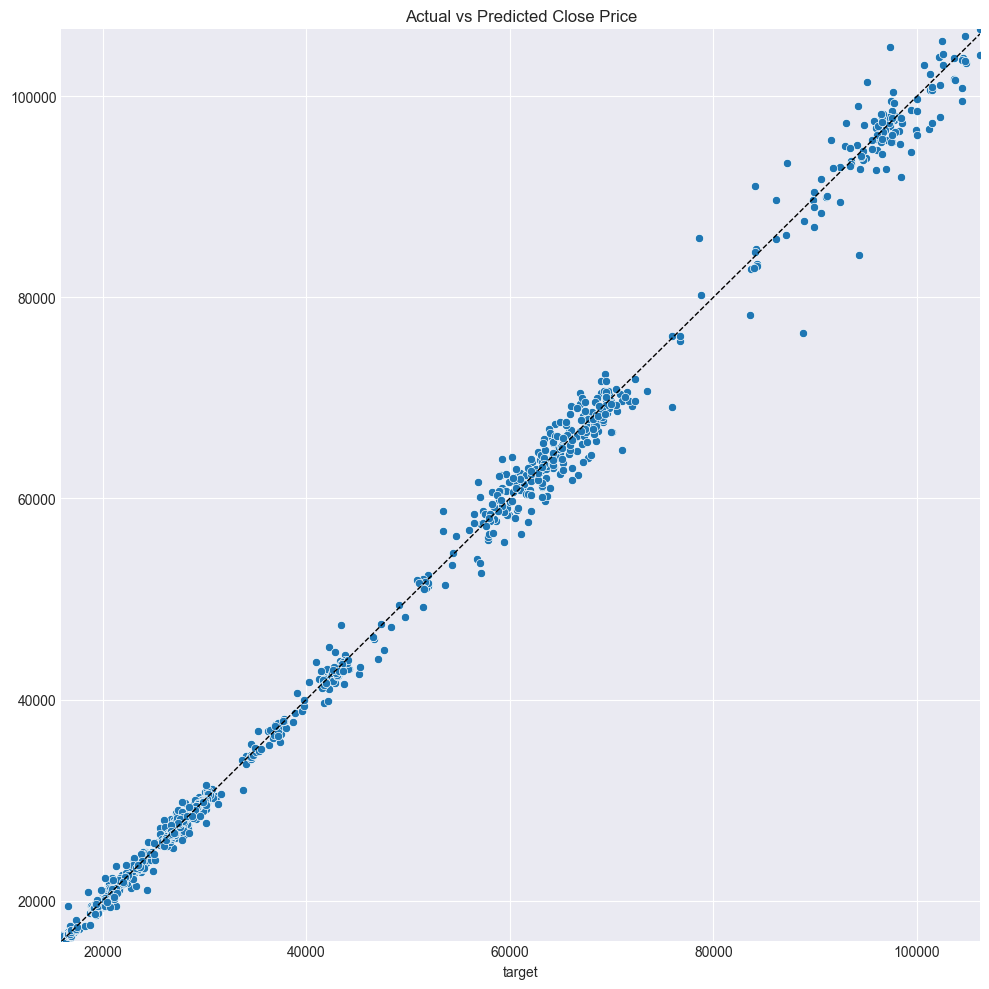

In [43]:
evaluate(y_test, preds)
plot_pred_vs_actual(preds, y_test, 'Actual BTC Price', 'Lasso Prediction', 'Date', 'BTC Close Price', 'Actual vs Predicted BTC CLose Price')
scatter_pred_vs_actual(preds, y_test, 'Actual vs Predicted Close Price')

Results seem suspiciously good here due to the prediction target chosen.

To provide a clearer picture of how well the model is doing, the target was changed to predict the percentage return for the following day


In [44]:
dataset = spx_btc.copy()
dataset['target'] = (dataset["Close_btc"].shift(-1) / dataset["Close_btc"]) - 1 # changed the target from price to return %
dataset = dataset.dropna() # last row becomes NaN after the shift

In [45]:
features = ['Open_btc', 'High_btc', 'Low_btc', 'Volume_btc',
            'Open_spx', 'High_spx', 'Low_spx', 'Close_spx', 'Volume_spx']
x = dataset[features]
y = dataset['target']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False) # No shuffle to keep chronological order. Shuffling would introduce data leaks - model shouldn't be trained on future data

In [47]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train) # normalise the data
x_test = scalar.transform(x_test)

In [48]:
reg = linear_model.LassoLarsCV(cv=5, max_iter=10_000)   # Lasso CV will automatically find the best alpha value
reg.fit(x_train, y_train)

LassoLarsCV(cv=5, max_iter=10000)

In [49]:
preds = reg.predict(x_test)


TEST RESULTS:
MAE:0.017627464745969303, MSE:0.0006990687629922652, RMSE:0.026439908528439828, R2:-0.0017545794953079952


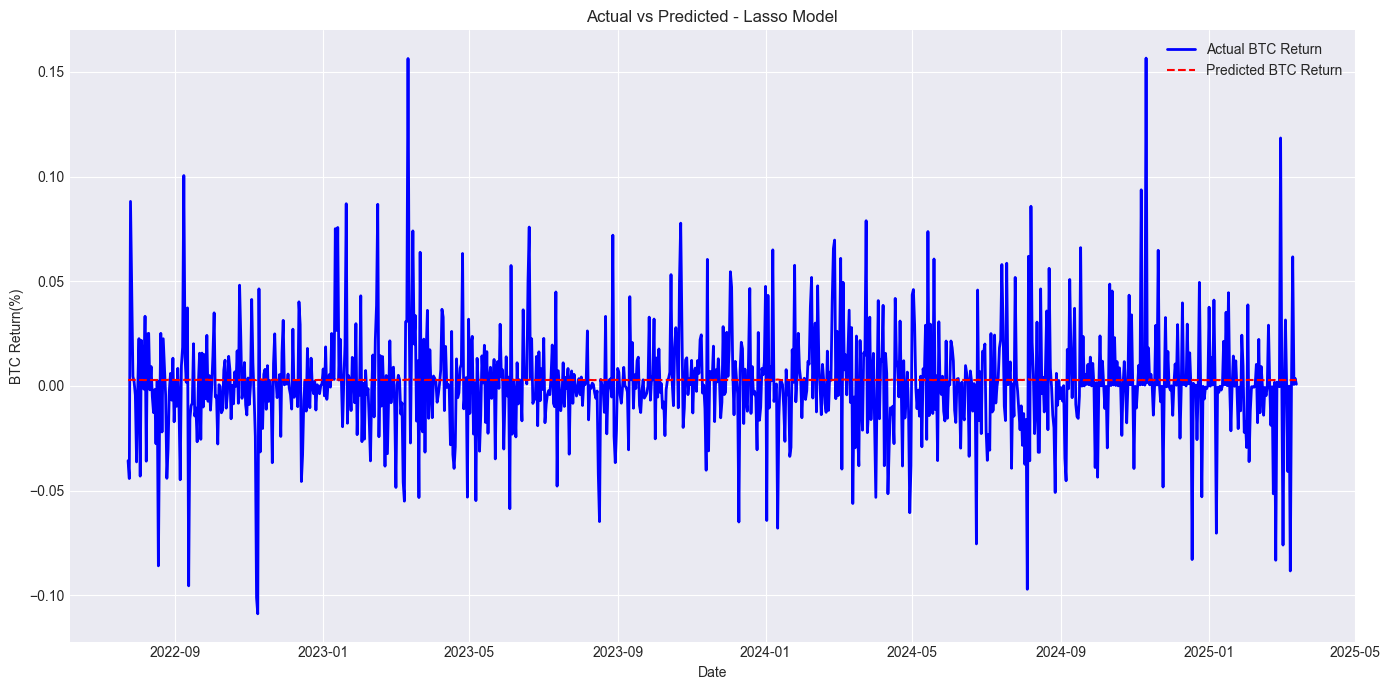

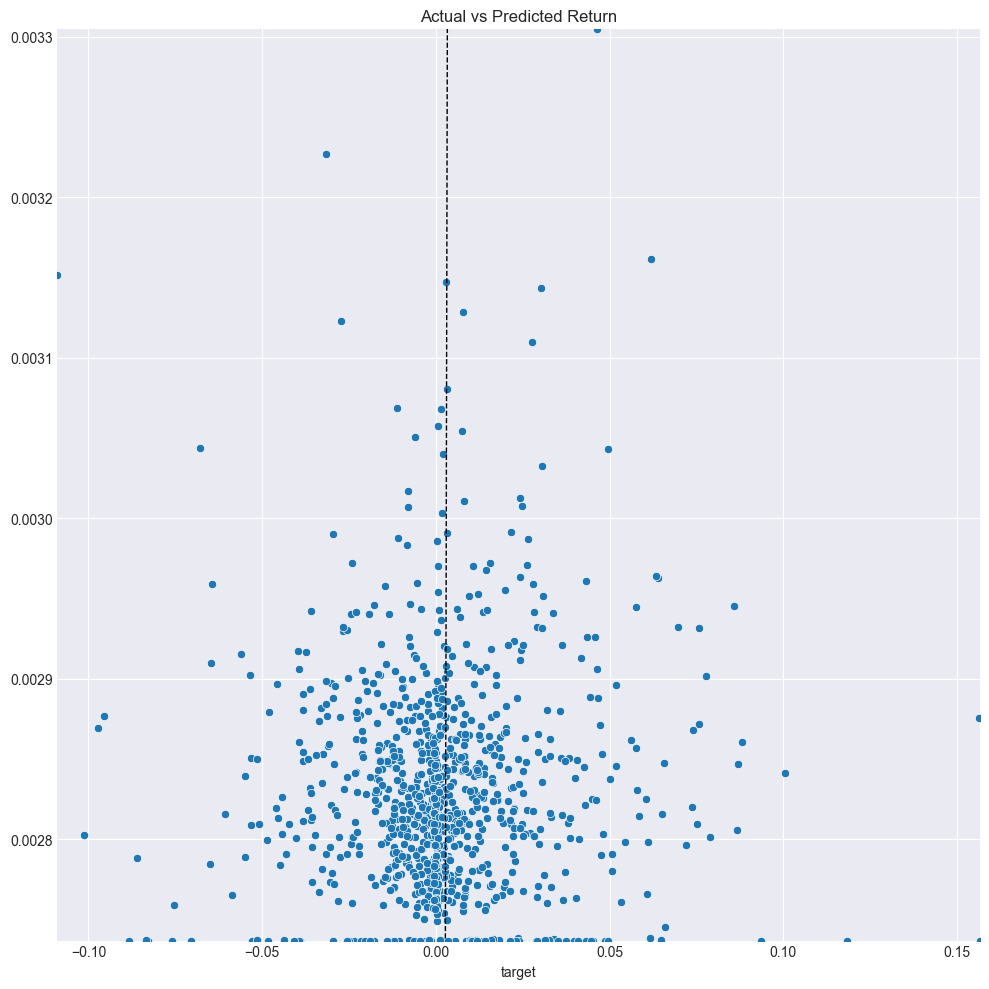

In [50]:
evaluate(y_test, preds)
plot_pred_vs_actual(preds, y_test, 'Actual BTC Return', 'Predicted BTC Return', 'Date', 'BTC Return(%)', 'Actual vs Predicted - Lasso Model')
scatter_pred_vs_actual(preds, y_test, 'Actual vs Predicted Return')

The results show that the model is always predicting very close to 0 returns for the next day.

### Adding Additional Features

In [51]:
dataset = datasetV2.copy()
dataset

,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Open_spx,High_spx,Low_spx,Close_spx,Volume_spx,...,Trend_btc_30,spx_return,Close_Ratio_spx_3,Trend_spx_3,Close_Ratio_spx_7,Trend_spx_7,Close_Ratio_spx_14,Trend_spx_14,Close_Ratio_spx_30,Trend_spx_30
datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-31,5.58,6.22,5.55,5.55,104.718333,104.011773,104.137820,102.956047,103.460281,157212000.0,...,0.240573,0.008757,0.998606,-0.003794,0.996369,-0.001012,0.997147,0.015332,1.010628,0.029733
2012-02-01,5.55,6.00,3.80,5.99,13.552446,104.224453,104.894129,104.098406,104.366272,166234500.0,...,0.286794,0.001586,1.005694,0.004963,1.005192,-0.000622,1.004953,0.013033,1.018180,0.038490
2012-02-02,5.99,6.26,5.54,6.26,123.582638,104.571148,104.799631,104.161476,104.531754,113090400.0,...,0.273869,0.014018,1.003960,0.009962,1.005914,0.006093,1.005881,0.009342,1.018443,0.040075
2012-02-03,6.26,6.35,5.93,6.29,283.382106,105.571691,106.060153,105.390489,105.997124,160598500.0,...,0.225732,0.000000,1.009833,0.024361,1.017019,0.020567,1.018553,0.019633,1.030916,0.052525
2012-02-04,6.29,6.50,5.94,6.50,67.694994,105.571691,106.060153,105.390489,105.997124,160598500.0,...,0.106515,0.000000,1.004630,0.015604,1.014041,0.020567,1.017129,0.019633,1.029207,0.049863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-10,82271.00,84007.00,77393.00,78561.00,2503.337195,565.887728,567.831831,553.923718,558.898743,99326600.0,...,-0.183975,-0.008313,0.982084,-0.026636,0.975899,-0.039871,0.961649,-0.062216,0.941847,-0.067901
2025-03-11,78599.00,78818.00,78576.00,78763.00,24.694112,557.722290,562.328429,550.364419,554.252686,88102100.0,...,-0.181456,0.005307,0.985429,-0.034948,0.972853,-0.036347,0.958154,-0.065555,0.936370,-0.076214
2025-03-12,81543.00,84437.00,80607.00,83620.00,1914.379561,560.483938,561.421121,552.029391,557.193848,69588200.0,...,-0.130072,-0.013331,1.000740,-0.029642,0.983966,-0.041788,0.967487,-0.060754,0.943775,-0.077698


In [52]:
features = ['Open_btc', 'High_btc', 'Low_btc', 'Volume_btc', 'Open_spx', 'High_spx', 'Low_spx', 'Close_spx', 'Volume_spx', 'Close_Ratio_btc_3',
 'Trend_btc_3', 'Close_Ratio_btc_7', 'Trend_btc_7', 'Close_Ratio_btc_14', 'Trend_btc_14', 'Close_Ratio_btc_30', 'Trend_btc_30', 'Close_Ratio_spx_3',
 'Trend_spx_3', 'Close_Ratio_spx_7', 'Trend_spx_7', 'Close_Ratio_spx_14', 'Trend_spx_14', 'Close_Ratio_spx_30', 'Trend_spx_30']

x = dataset[features]
y = dataset['btc_return'] # target is bitcoin return %

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False) # No shuffle to keep chronological order. Shuffling would introduce data leaks - model shouldn't be trained on future data

In [54]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [55]:
reg = linear_model.LassoLarsCV(cv=5, max_iter=10_000)   # Lasso CV will automatically find the best alpha value
reg.fit(x_train, y_train)

LassoLarsCV(cv=5, max_iter=10000)

In [56]:
preds = reg.predict(x_test)


TEST RESULTS:
MAE:0.017358947039592867, MSE:0.0006899284219271332, RMSE:0.026266488572459265, R2:-0.0015735807958643377


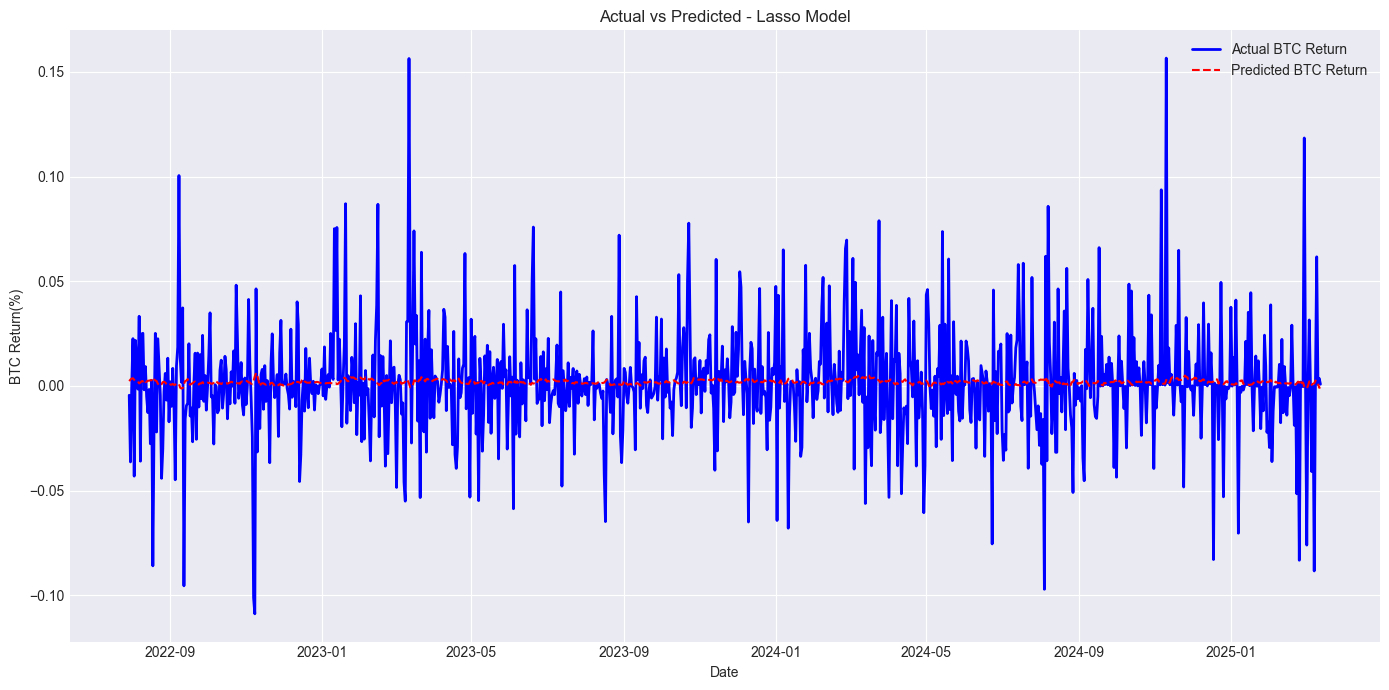

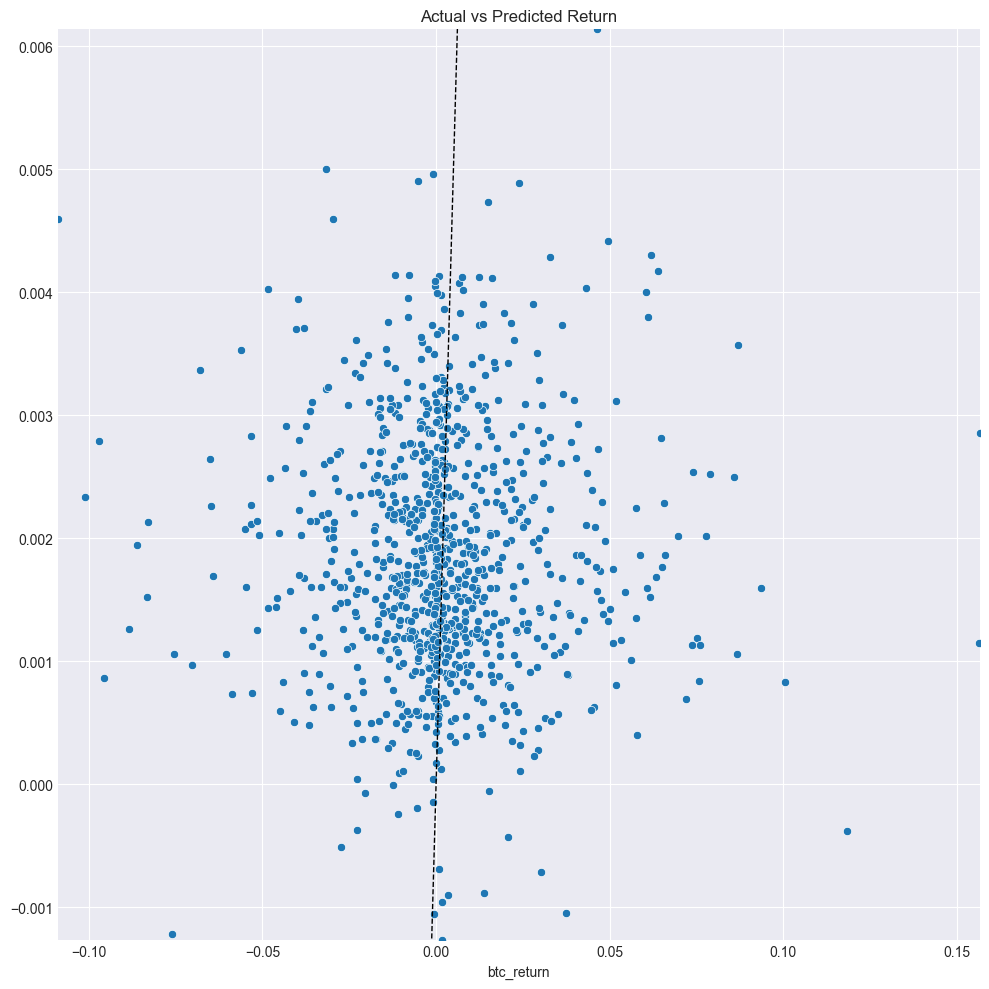

In [57]:
evaluate(y_test, preds)
plot_pred_vs_actual(preds, y_test, 'Actual BTC Return', 'Predicted BTC Return', 'Date', 'BTC Return(%)', 'Actual vs Predicted - Lasso Model')
scatter_pred_vs_actual(preds, y_test, 'Actual vs Predicted Return')

With these new features the model is now nudged in the right direction, but still not making any meaningfull predictions. Most predictions are still extremely close to zero returns.

### More Features Added

Dataset V3 with features added for:
- Lagged return
- RSI
- Volatility

In [58]:
dataset = datasetV3.copy()
dataset

,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Open_spx,High_spx,Low_spx,Close_spx,Volume_spx,...,Close_Ratio_spx_30,Trend_spx_30,return_btc_1,return_btc_5,return_spx_1,return_spx_5,RSI_btc,RSI_spx,btc_Vol_14,spx_Vol_14
datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-31,5.58,6.22,5.55,5.55,104.718333,104.011773,104.137820,102.956047,103.460281,157212000.0,...,1.010628,0.029733,-0.055764,-0.072571,-0.003419,-0.009018,44.786470,62.459332,0.100754,0.004525
2012-02-01,5.55,6.00,3.80,5.99,13.552446,104.224453,104.894129,104.098406,104.366272,166234500.0,...,1.018180,0.038490,-0.005391,-0.121978,-0.000380,-0.004255,44.528067,61.655184,0.100744,0.004488
2012-02-02,5.99,6.26,5.54,6.26,123.582638,104.571148,104.799631,104.161476,104.531754,113090400.0,...,1.018443,0.040075,0.076293,0.018535,0.008719,0.004919,49.161077,70.934849,0.103130,0.004128
2012-02-03,6.26,6.35,5.93,6.29,283.382106,105.571691,106.060153,105.390489,105.997124,160598500.0,...,1.030916,0.052525,0.044089,0.242906,0.001584,0.006503,51.820270,72.255573,0.093799,0.003943
2012-02-04,6.29,6.50,5.94,6.50,67.694994,105.571691,106.060153,105.390489,105.997124,160598500.0,...,1.029207,0.049863,0.004781,0.064009,0.013921,0.020425,52.119945,80.643419,0.084440,0.005271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-10,82271.00,84007.00,77393.00,78561.00,2503.337195,565.887728,567.831831,553.923718,558.898743,99326600.0,...,0.941847,-0.067901,-0.000116,-0.012202,0.000000,-0.001631,39.412854,33.965621,0.048807,0.010175
2025-03-11,78599.00,78818.00,78576.00,78763.00,24.694112,557.722290,562.328429,550.364419,554.252686,88102100.0,...,0.936370,-0.076214,-0.092586,-0.104008,-0.026997,-0.039318,30.339244,25.505778,0.052610,0.012048
2025-03-12,81543.00,84437.00,80607.00,83620.00,1914.379561,560.483938,561.421121,552.029391,557.193848,69588200.0,...,0.943775,-0.077698,0.002568,-0.132455,-0.008348,-0.029755,30.794033,23.584055,0.052626,0.012091


In [59]:
features = ['Open_btc', 'High_btc', 'Low_btc', 'Volume_btc', 'Open_spx', 'High_spx', 'Low_spx', 'Close_spx', 'Volume_spx', 'Close_Ratio_btc_3', 'Trend_btc_3', 'Close_Ratio_btc_7', 'Trend_btc_7',
 'Close_Ratio_btc_14', 'Trend_btc_14', 'Close_Ratio_btc_30', 'Trend_btc_30', 'Close_Ratio_spx_3', 'Trend_spx_3', 'Close_Ratio_spx_7', 'Trend_spx_7', 'Close_Ratio_spx_14', 'Trend_spx_14', 'Close_Ratio_spx_30',
 'Trend_spx_30', 'return_btc_1', 'return_btc_5', 'return_spx_1', 'return_spx_5', 'RSI_btc', 'RSI_spx', 'btc_Vol_14', 'spx_Vol_14']

x = dataset[features]
y = dataset['btc_return'] # target is bitcoin return %

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False) # No shuffle to keep chronological order. Shuffling would introduce data leaks - model shouldn't be trained on future data

In [61]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [62]:
reg = linear_model.LassoLarsCV(cv=5, max_iter=10_000)   # Lasso CV will automatically find the best alpha value
reg.fit(x_train, y_train)

LassoLarsCV(cv=5, max_iter=10000)

In [63]:
preds = reg.predict(x_test)


TEST RESULTS:
MAE:0.0176110436820001, MSE:0.000700786541760922, RMSE:0.026472373179617315, R2:-0.017336384033135754


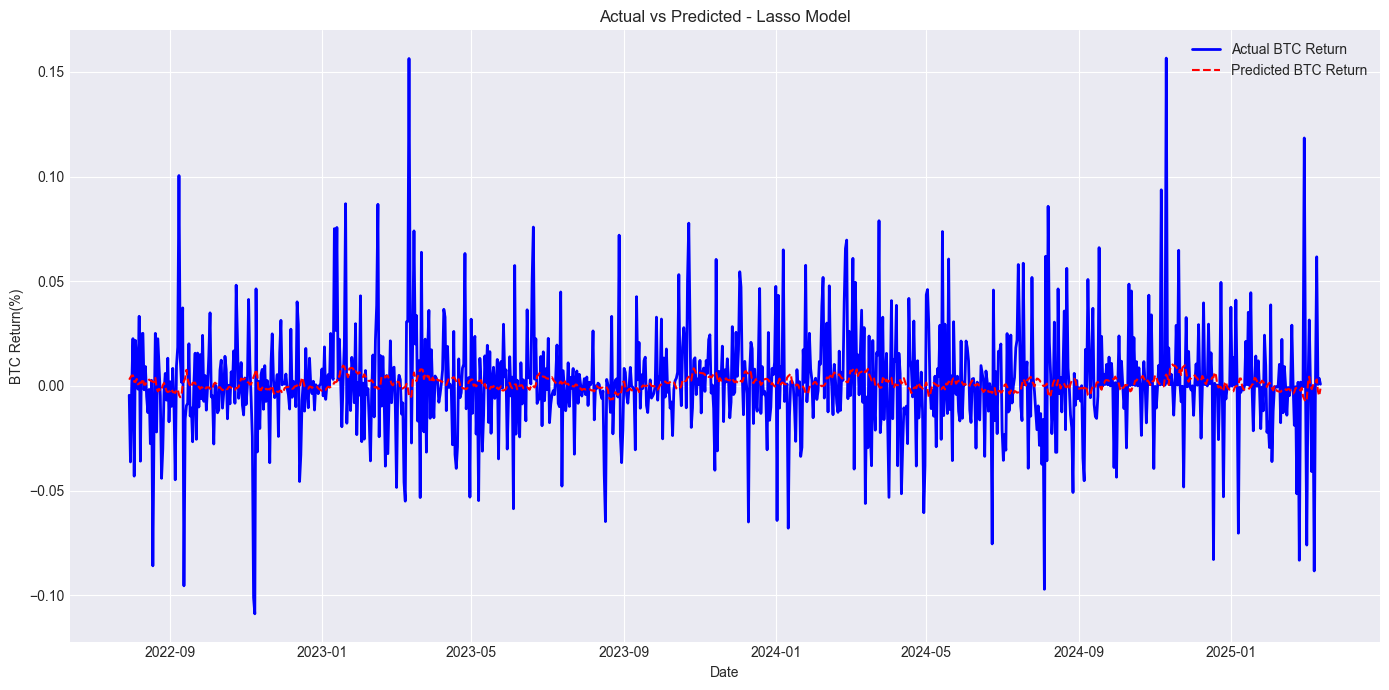

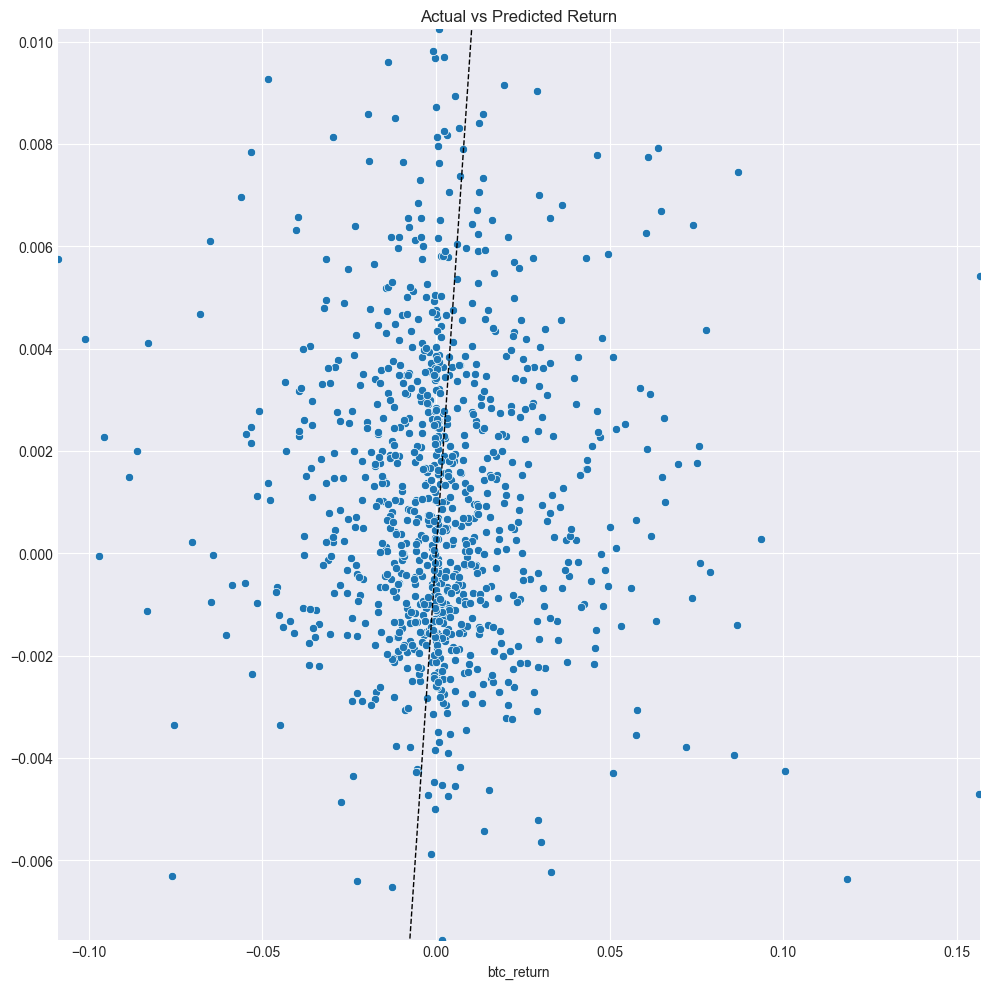

In [64]:
evaluate(y_test, preds)
plot_pred_vs_actual(preds, y_test, 'Actual BTC Return', 'Predicted BTC Return', 'Date', 'BTC Return(%)', 'Actual vs Predicted - Lasso Model')
scatter_pred_vs_actual(preds, y_test, 'Actual vs Predicted Return')

With multiple attempts at using the lasso model, the results show it might not be the best fit for the problem. Alternative Models were explored.

## Random Forrest Regressor

Random forrest regression is a commmon model used for stock prediction, able to capture non-linear relationships


In [65]:
dataset = datasetV3.copy()
dataset

,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Open_spx,High_spx,Low_spx,Close_spx,Volume_spx,...,Close_Ratio_spx_30,Trend_spx_30,return_btc_1,return_btc_5,return_spx_1,return_spx_5,RSI_btc,RSI_spx,btc_Vol_14,spx_Vol_14
datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-31,5.58,6.22,5.55,5.55,104.718333,104.011773,104.137820,102.956047,103.460281,157212000.0,...,1.010628,0.029733,-0.055764,-0.072571,-0.003419,-0.009018,44.786470,62.459332,0.100754,0.004525
2012-02-01,5.55,6.00,3.80,5.99,13.552446,104.224453,104.894129,104.098406,104.366272,166234500.0,...,1.018180,0.038490,-0.005391,-0.121978,-0.000380,-0.004255,44.528067,61.655184,0.100744,0.004488
2012-02-02,5.99,6.26,5.54,6.26,123.582638,104.571148,104.799631,104.161476,104.531754,113090400.0,...,1.018443,0.040075,0.076293,0.018535,0.008719,0.004919,49.161077,70.934849,0.103130,0.004128
2012-02-03,6.26,6.35,5.93,6.29,283.382106,105.571691,106.060153,105.390489,105.997124,160598500.0,...,1.030916,0.052525,0.044089,0.242906,0.001584,0.006503,51.820270,72.255573,0.093799,0.003943
2012-02-04,6.29,6.50,5.94,6.50,67.694994,105.571691,106.060153,105.390489,105.997124,160598500.0,...,1.029207,0.049863,0.004781,0.064009,0.013921,0.020425,52.119945,80.643419,0.084440,0.005271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-10,82271.00,84007.00,77393.00,78561.00,2503.337195,565.887728,567.831831,553.923718,558.898743,99326600.0,...,0.941847,-0.067901,-0.000116,-0.012202,0.000000,-0.001631,39.412854,33.965621,0.048807,0.010175
2025-03-11,78599.00,78818.00,78576.00,78763.00,24.694112,557.722290,562.328429,550.364419,554.252686,88102100.0,...,0.936370,-0.076214,-0.092586,-0.104008,-0.026997,-0.039318,30.339244,25.505778,0.052610,0.012048
2025-03-12,81543.00,84437.00,80607.00,83620.00,1914.379561,560.483938,561.421121,552.029391,557.193848,69588200.0,...,0.943775,-0.077698,0.002568,-0.132455,-0.008348,-0.029755,30.794033,23.584055,0.052626,0.012091


In [66]:
features = ['Open_btc', 'High_btc', 'Low_btc', 'Volume_btc', 'Open_spx', 'High_spx', 'Low_spx', 'Close_spx', 'Volume_spx', 'Close_Ratio_btc_3', 'Trend_btc_3', 'Close_Ratio_btc_7', 'Trend_btc_7',
 'Close_Ratio_btc_14', 'Trend_btc_14', 'Close_Ratio_btc_30', 'Trend_btc_30', 'Close_Ratio_spx_3', 'Trend_spx_3', 'Close_Ratio_spx_7', 'Trend_spx_7', 'Close_Ratio_spx_14', 'Trend_spx_14', 'Close_Ratio_spx_30',
 'Trend_spx_30', 'return_btc_1', 'return_btc_5', 'return_spx_1', 'return_spx_5', 'RSI_btc', 'RSI_spx', 'btc_Vol_14', 'spx_Vol_14']

x = dataset[features]
y = dataset['btc_return']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False) # No shuffle to keep chronological order

In [68]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000,  min_samples_leaf=50, n_jobs=-1)
model.fit(x_train, y_train)

RandomForestRegressor(min_samples_leaf=50, n_estimators=1000, n_jobs=-1)

In [69]:
preds = model.predict(x_test)


TEST RESULTS:
MAE:0.01769858479730245, MSE:0.0006964142941454283, RMSE:0.026389662637961636, R2:-0.010989163711143002


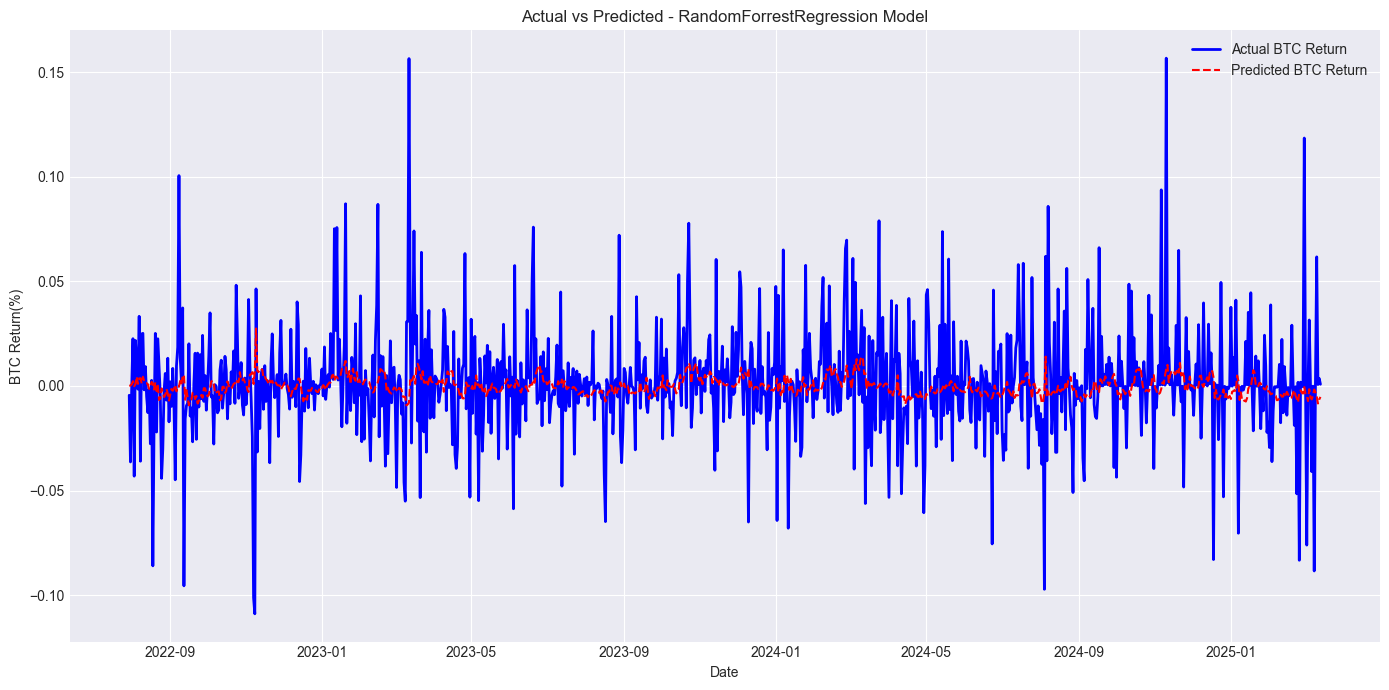

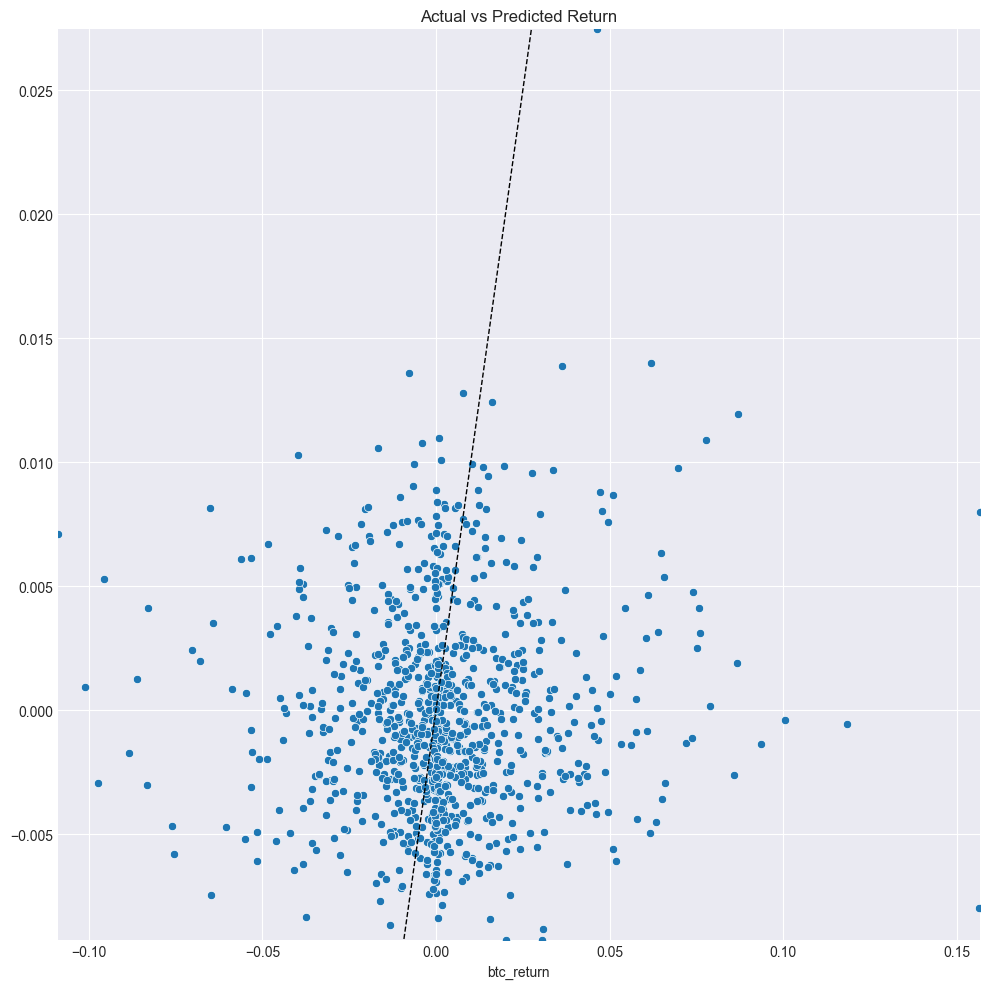

In [70]:
evaluate(y_test, preds)
plot_pred_vs_actual(preds, y_test, 'Actual BTC Return', 'Predicted BTC Return', 'Date', 'BTC Return(%)', 'Actual vs Predicted - RandomForrestRegression Model')
scatter_pred_vs_actual(preds, y_test, 'Actual vs Predicted Return')

## LSTM

https://www.geeksforgeeks.org/stock-price-prediction-project-using-tensorflow/

LSTM is a standard model to use for stock price prediction

In [71]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [72]:
dataset = datasetV3.copy()
features = ['Open_btc', 'High_btc', 'Low_btc', 'Volume_btc', 'Open_spx', 'High_spx', 'Low_spx', 'Close_spx',
            'Volume_spx', 'Close_Ratio_btc_3', 'Trend_btc_3', 'Close_Ratio_btc_7', 'Trend_btc_7',
            'Close_Ratio_btc_14', 'Trend_btc_14', 'Close_Ratio_btc_30', 'Trend_btc_30', 'Close_Ratio_spx_3',
            'Trend_spx_3', 'Close_Ratio_spx_7', 'Trend_spx_7', 'Close_Ratio_spx_14', 'Trend_spx_14',
            'Close_Ratio_spx_30',
            'Trend_spx_30', 'return_btc_1', 'return_btc_5', 'return_spx_1', 'return_spx_5', 'RSI_btc', 'RSI_spx',
            'btc_Vol_14', 'spx_Vol_14']

x = dataset[features]
y = dataset[['btc_return']]

In [73]:
scaler_x = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler_x.fit_transform(x)

scaler_y = StandardScaler()
y_scaled  = scaler_y.fit_transform(y)

In [74]:
# build sliding windows
window = 100 # days per window
x_sequence = []
y_sequence = []
for i in range(window, len(x_scaled)):
    x_sequence.append(x_scaled[i - window:i])
    y_sequence.append(y_scaled[i])
x_sequence = np.array(x_sequence)
y_sequence = np.array(y_sequence)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x_sequence, y_sequence, test_size=0.1, shuffle=False) # No shuffle to keep chronological order

In [76]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4222, 100, 33), (4222, 1), (470, 100, 33), (470, 1))

In [77]:
model = Sequential()
model.add(Input(shape=(window, x_train.shape[2])))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 64)        │        25,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,225 (235.25 KB)

 Trainable params: 60,225 (235.25 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
from tensorflow.python.keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(patience=8, restore_best_weights=True)] # early stop to prevent overfitting
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, verbose=1, validation_split = 0.1, shuffle=False, callbacks=callbacks)

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 1.4540 - val_loss: 0.3535
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.4250 - val_loss: 0.3482
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.4165 - val_loss: 0.3482
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.4170 - val_loss: 0.3498
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.4070 - val_loss: 0.3477
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.4080 - val_loss: 0.3476
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.4054 - val_loss: 0.3472
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.4070 - val_loss: 0.3474
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.4062 - val_loss: 0.3485
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.4020 - val_loss: 0.3474
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.4063 - val_loss: 0.3483
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 

In [79]:
preds_scaled = model.predict(x_test) # make predictions on test set
preds = scaler_y.inverse_transform(preds_scaled) # reverse scalar transformation
actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step



TEST RESULTS:
MAE:0.01850484865269517, MSE:0.0007703838954215626, RMSE:0.027755790304395272, R2:-0.007121372615726207


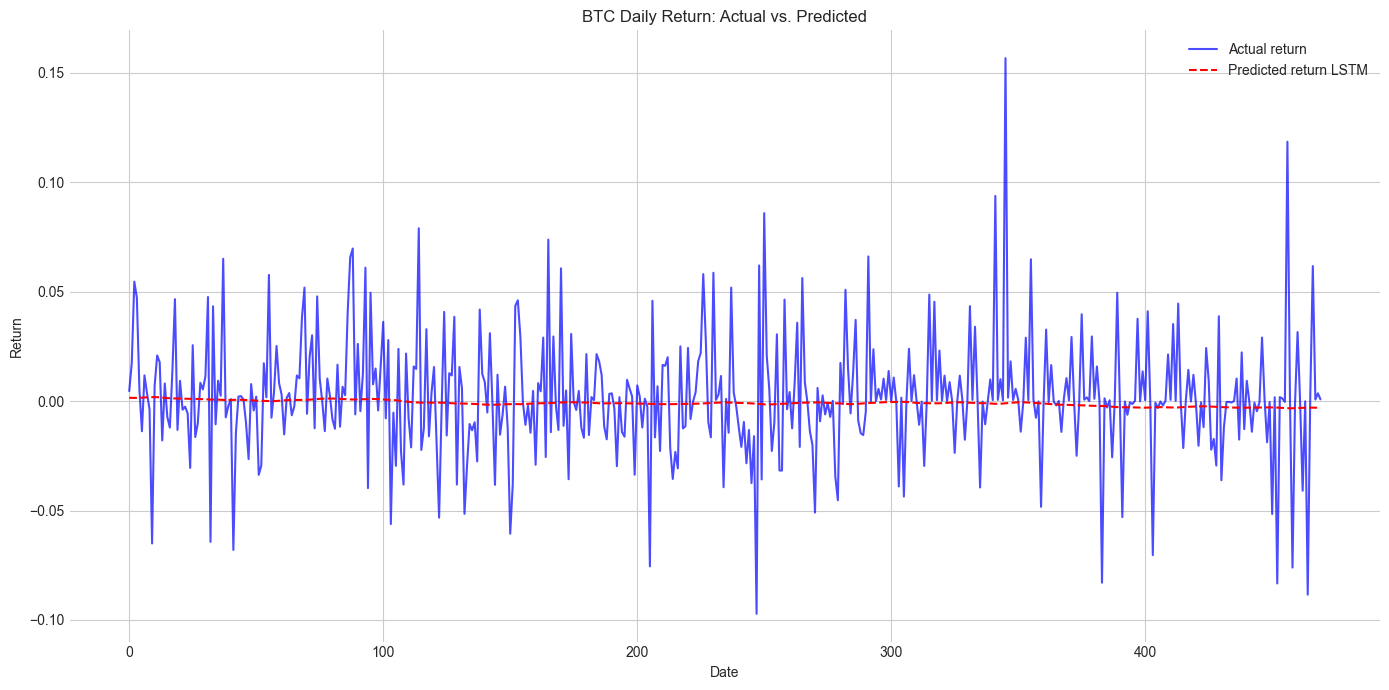

In [80]:
preds = preds.flatten()
actual = actual.flatten()

evaluate(actual, preds)
plt.figure(figsize=(14, 7))
plt.plot(actual, label='Actual return', color='blue', alpha=0.7)
plt.plot(preds, label='Predicted return LSTM', color='red', linestyle='--')
plt.title('BTC Daily Return: Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Stage 6**
***Present results and Conclusions***

Predicting daily Bitcoin returns remains a challenging task. The models show some predictive capability, the accuracy and reliability would not be sufficient for profitable trading in a real-world scenario.
